# Importing Necessary Files

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import EarlyStopping

# Downloadig Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


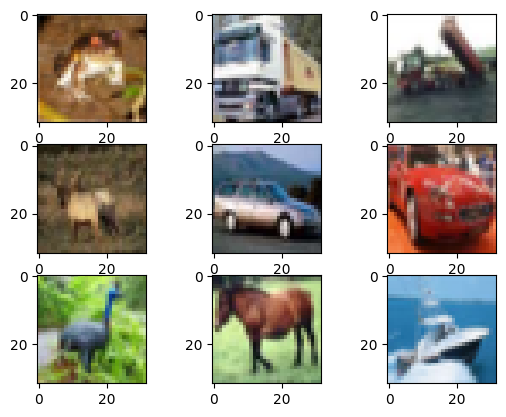

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
plt.show()

# Normalize pixel values

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode labels

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Create the DenseNet model

In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

29084464/29084464 [==============================] - 0s 0us/step


# Freeze the layers in the base model

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

# Add additional layers for classification

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


# Compile the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 7,302,474
Trainable params: 264,970
Non-trainable params: 7,037,504
_________________________________________________________________


# Train the model

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stop])


Epoch 1/10
1563/1563 [==============================] - 47s 19ms/step - loss: 1.4206 - accuracy: 0.5008 - val_loss: 1.1478 - val_accuracy: 0.5989
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2221 - accuracy: 0.5700 - val_loss: 1.0744 - val_accuracy: 0.6209
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1614 - accuracy: 0.5911 - val_loss: 1.0620 - val_accuracy: 0.6311
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1282 - accuracy: 0.6033 - val_loss: 1.0568 - val_accuracy: 0.6361
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0919 - accuracy: 0.6162 - val_loss: 1.0448 - val_accuracy: 0.6421
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0751 - accuracy: 0.6204 - val_loss: 1.0295 - val_accuracy: 0.6412
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0495 - accuracy: 0.6306 - val_loss: 1.0246 -

# Evaluate the model on the test set

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 4s 14ms/step - loss: 1.0137 - accuracy: 0.6521
Test accuracy: 0.6521000266075134


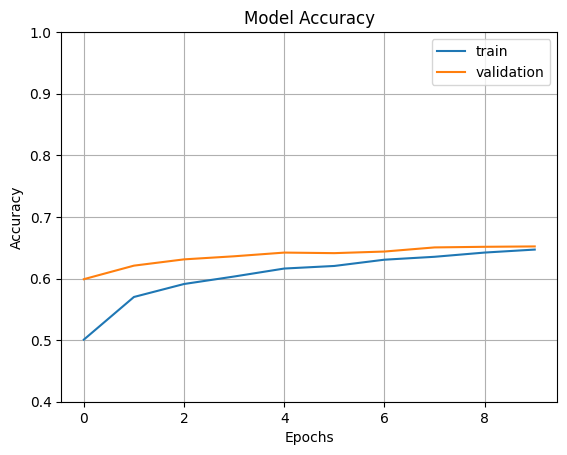

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

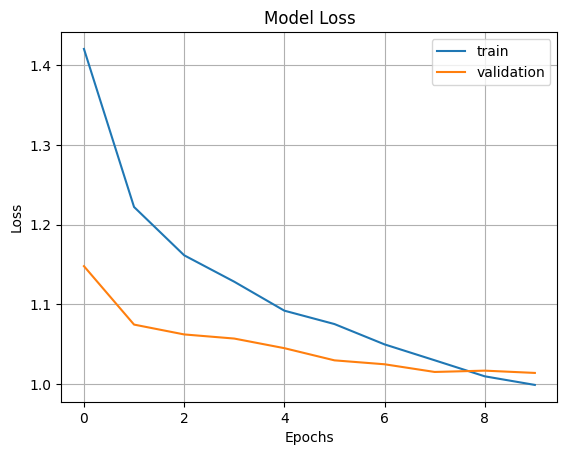

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()